<a href="https://colab.research.google.com/github/hikmaharani/SpotifyUserReviews/blob/main/project_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import emoji
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('DATASET.csv')
df

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
...,...,...
52697,Yes the best,POSITIVE
52698,Spotify won my heart in Feb 2024 You won my he...,POSITIVE
52699,I tried to open the app and it wont open I res...,POSITIVE
52700,Good,POSITIVE


# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


In [ ]:
df['label'].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [ ]:
df = df.dropna()
df.isnull().sum()

Review    0
label     0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.shape

(51472, 2)

In [ ]:
df.describe()

,Review,label
count,51472,51472
unique,51472,2
top,"Great music service, the audio is high quality...",NEGATIVE
freq,1,29345


In [ ]:
def remove_emoji_and_emoticons(string):
    string = emoji.replace_emoji(string, replace='')
    emoticon_pattern = re.compile(r'[:;=][oO\-]?[\)\(\[\]DdpP]')
    string = emoticon_pattern.sub(r'', string)
    return string

df.Review = df.Review.apply(remove_emoji_and_emoticons)
df.Review = df.Review.str.strip()

In [ ]:
df.Review = df.Review.str.replace(","," ")
df.Review = df.Review.str.replace(r'\W',' ')
df.Review = df.Review.str.strip().str.lower()
df.Review = df.Review.str.strip().str.lower().str.replace(f"[{string.punctuation}]", " ", regex=True)

In [ ]:
df.to_csv('pre.csv', index=False)

In [ ]:
df.Review = df.Review.apply(word_tokenize)

In [ ]:
df.to_csv('tokenisasi.csv', index=False)

In [ ]:
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
df.to_csv('stopword.csv', index=False)

In [ ]:
stemmer = SnowballStemmer("english")
df['Review'] = df['Review'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
df.to_csv('stemming.csv', index=False)

In [ ]:
df.head()

,Review,label
0,"[great, music, servic, audio, high, qualiti, a...",POSITIVE
1,"[pleas, ignor, previous, negat, rate, app, sup...",POSITIVE
2,"[pop, get, best, spotifi, experi, android, 12,...",NEGATIVE
3,"[realli, buggi, terribl, use, recent]",NEGATIVE
4,"[dear, spotifi, get, song, put, playlist, shuf...",NEGATIVE


In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,Review,label
0,"[great, music, servic, audio, high, qualiti, a...",1
1,"[pleas, ignor, previous, negat, rate, app, sup...",1
2,"[pop, get, best, spotifi, experi, android, 12,...",0
3,"[realli, buggi, terribl, use, recent]",0
4,"[dear, spotifi, get, song, put, playlist, shuf...",0


In [ ]:
df_negatif = df[df['label'] == 0]
df_positif = df[df['label'] == 1]

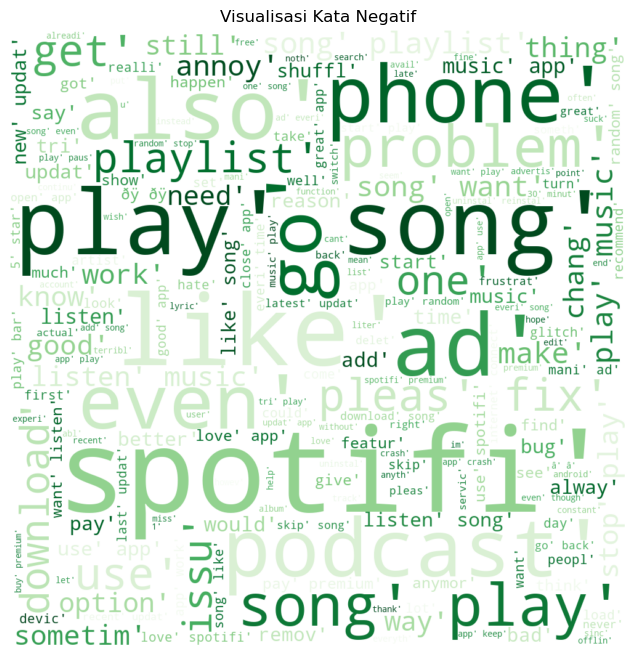

In [ ]:
all_text_0 = ' '.join(str(word) for word in df_negatif["Review"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

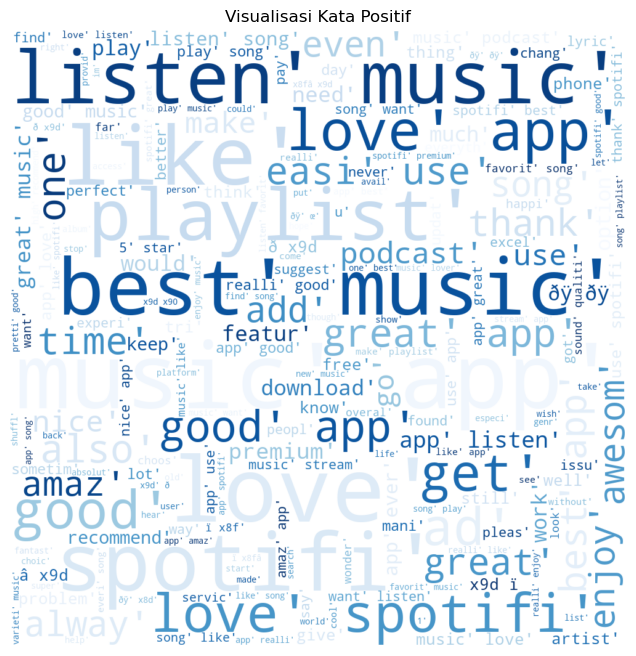

In [ ]:
all_text_1 = ' '.join(str(word) for word in df_positif["Review"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
df['label'].value_counts()

label
0    29345
1    22127
Name: count, dtype: int64

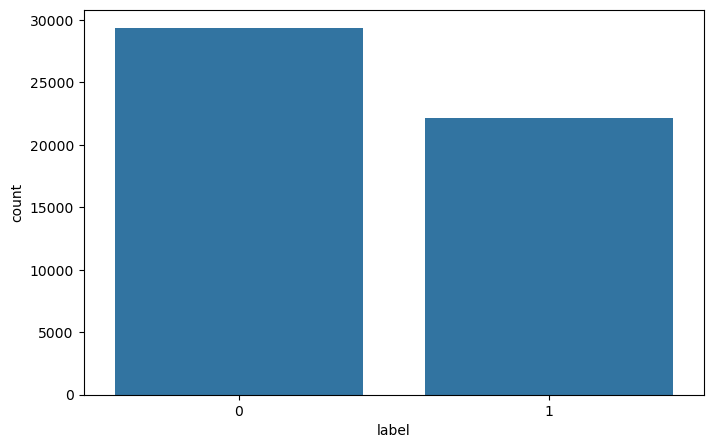

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.show()

In [ ]:
x= df['Review']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
x_train = [' '.join(words) if isinstance(words, list) else words for words in x_train]
x_test = [' '.join(words) if isinstance(words, list) else words for words in x_test]

In [ ]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train_vec, y_train)

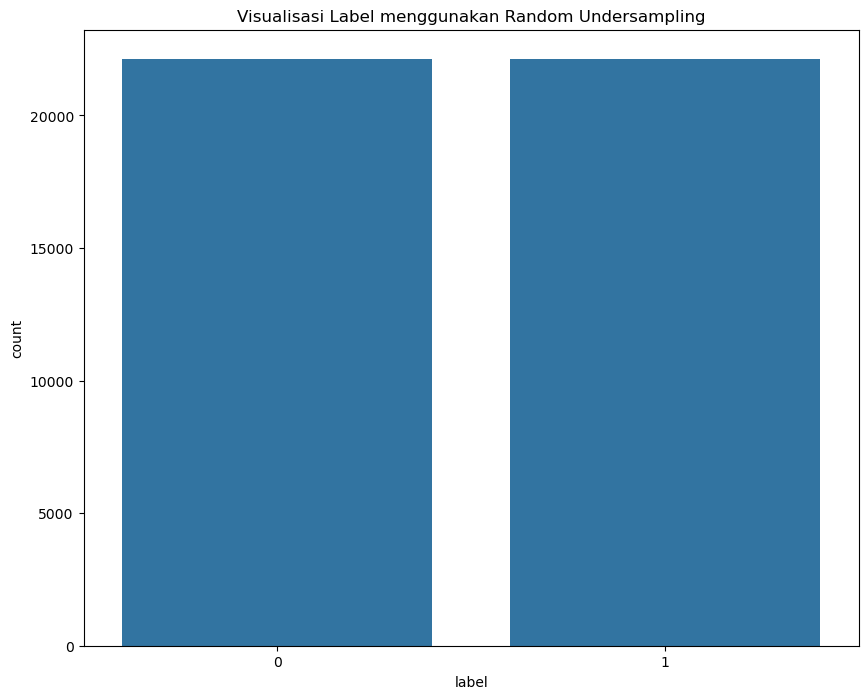

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='label', data=df_rus)
plt.title('Visualisasi Label menggunakan Random Undersampling')
plt.show()

In [ ]:
df_rus['label'].value_counts()

label
0    22127
1    22127
Name: count, dtype: int64

# modelling

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_rus, y_train_rus)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(x_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])

print("Akurasi : ", accuracy)
print("\nClassification Report :\n ", classification)

Akurasi :  0.8585675430643699

Classification Report :
                precision    recall  f1-score   support

     negatif       0.90      0.85      0.87      4422
     positif       0.81      0.87      0.84      3299

    accuracy                           0.86      7721
   macro avg       0.85      0.86      0.86      7721
weighted avg       0.86      0.86      0.86      7721



# Testing

In [ ]:
new_text = input("\nMasukkan Teks : ")
new_text_vec =vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentiment_label = "positif"
elif predicted_sentimen[0] == 0:
    sentiment_label = "negatif"

print("Hasil Analisis : ", sentiment_label)

Hasil Analisis :  positif
